<a href="https://colab.research.google.com/github/avimonda298/MachineLearning-Supervised/blob/master/pca_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 12th October, 2022
# MNIST dataset downloaded from Kaggle : 
#     https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
# Ref: https://github.com/ranasingh-gkp/PCA-TSNE-on-MNIST-dataset/blob/master/14_15_16(PCA%2CT_SNE).ipynb
#      https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/


## Call libraries

In [ ]:
# 1.0

import numpy as np
import pandas as pd

# 1.1
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

# 1.2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay


# 1.3
import matplotlib.pyplot as plt
import seaborn as sns

# 1.4
import os,time

In [ ]:
# 1.5 Display multiple outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Mount gdrive

In [ ]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Read Data

In [ ]:
# 2.1 Path to mnist csv file Folder:

pathToFolder = "/gdrive/MyDrive/Colab_data_files/PCA/"

In [ ]:
# 2.2 Change current directory to where csv files are:

os.chdir(pathToFolder)
os.listdir()

['mnist_train.csv']

In [ ]:
# 2.3 Read MNIST data file:

df = pd.read_csv('mnist_train.csv')

In [ ]:
# 2.4 Shape and dtypes?

df.shape    # (60000, 785)
print("\n==========\n")
df.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [ ]:
# 2.5 Look at the data:

df.head(5)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 2.6 Brief statistical description of data:

df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
# 2.7 Separate predictors from labels:

y = df.pop('label')
X = df

## Plot a digit

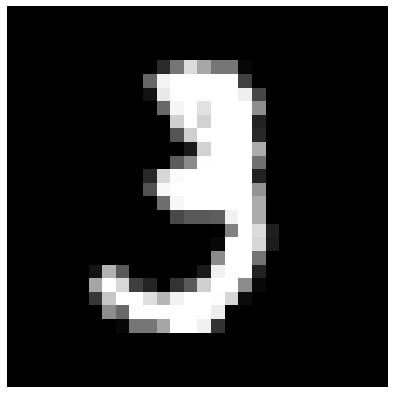



It is digit:  3




In [ ]:
# 3.0 Plot digit at idx:

# 3.1 Data?
idx = 10   # Plot image at 11th row
im = df.iloc[idx,:].values.reshape(28,28)


# 3.2 Plot digit
_=plt.figure(figsize=(10,7)) ;
_=plt.imshow(im, cmap = "gray");
_=plt.axis("off")
plt.show();


# 3.3 Digit label
print("\n=======\n")
print("It is digit: ", y[idx])
print("\n=======\n")

## Pre-processing
Before PCA data must be standardized

In [ ]:
# 4.0 Standardize data:
#      Before PCA data must be standardized 

ss= StandardScaler()
ss.fit(X)
X = ss.transform(X)

## PCA now

In [ ]:
# 5.0 Instantiate PCA class with default parameters:
#       https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = decomposition.PCA(n_components =2)

In [ ]:
# 5.1 Fit and transform X:
 
pca_data = pca.fit_transform(X)

In [ ]:
# 5.2 Shape of transformed data:

pca_data.shape
print("\n==========\n")
pca_data[:2]


array([[-0.9224566 , -4.8134037 ],
       [ 8.70915652, -7.75504908]])

## PCA for data visualization

In [ ]:
# 6.0 Transform numpy array to pandas DataFrame:

pca_df = pd.DataFrame(
                       data=pca_data,
                       columns=("1st_principal", "2nd_principal")
                      )
# 6.0.1
pca_df.head()

,1st_principal,2nd_principal
0,-0.922457,-4.813404
1,8.709157,-7.755049
2,2.328299,9.431420
3,-6.582221,-3.746077
4,-5.183254,3.133517


In [ ]:
# 6.1 Make a copy to work with:

pcadf = pca_df.copy()

In [ ]:
# 6.2 Add a column of digit labales also:

pca_df['labels'] = y
pca_df.head()

,1st_principal,2nd_principal,labels
0,-0.922457,-4.813404,5
1,8.709157,-7.755049,0
2,2.328299,9.431420,4
3,-6.582221,-3.746077,1
4,-5.183254,3.133517,9


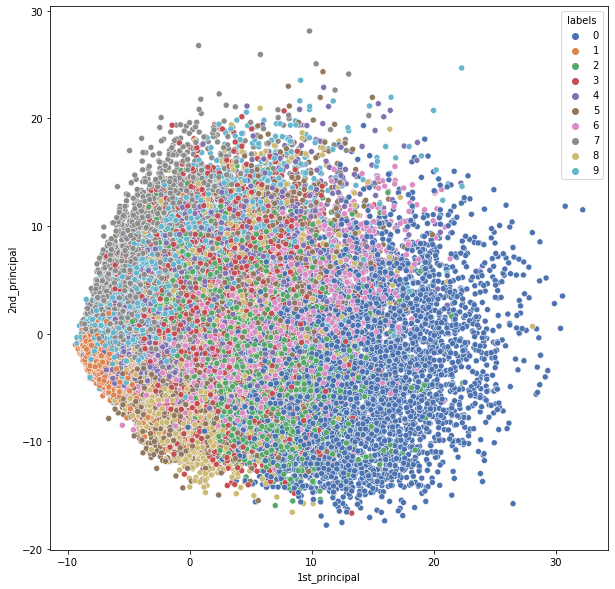

In [ ]:
# 6.3 Draw a scatterplot coloured by labels:
#      How good PCA has been in separating data-points

_=plt.figure(figsize = (10,10))
sns.scatterplot(
                 data = pca_df,
                 x = "1st_principal",
                 y = "2nd_principal",
                 hue = "labels",
                 palette="deep"
                ) ;

In [ ]:
# 6.4 Explained variance by each pricipal component:

print(pca.explained_variance_ratio_)

[0.05646717 0.04078272]


In [ ]:
# 6.5 Cumulative variance, component-by-component:

cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
cum_var_explained

array([0.05646717, 0.09724989])

## PCA for dimensionality reduction
What is appropriate value of n_components?

In [ ]:
# 7.0 PCA for dimensionality redcution (non-visualization)
#       Let n_components be 780 only:

n_comp = 780
pca = decomposition.PCA(n_components =n_comp)
pca_data = pca.fit_transform(X)

In [ ]:
# 7.1 Explained variance, component by component

pca.explained_variance_ratio_.shape
pca.explained_variance_ratio_[:10]

array([0.05646717, 0.04078272, 0.0373938 , 0.02885115, 0.02521109,
       0.0219427 , 0.01923344, 0.01745799, 0.01535092, 0.0140172 ])

In [ ]:
# 7.2 Cumulative variance, component by component

cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

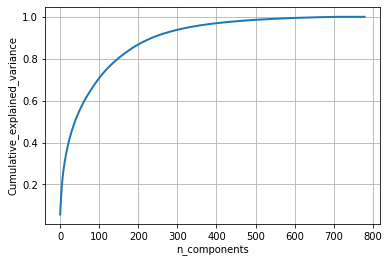

In [ ]:
# 8.0 Plot the cumulative variance vs n_componets:

_=plt.figure(1, figsize=(6, 4))

_=plt.plot(cum_var_explained, linewidth=2)
_= plt.axis('tight')
_= plt.grid()
_= plt.xlabel('n_components')
_= plt.ylabel('Cumulative_explained_variance')
plt.show()


In [ ]:
pca_data

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.00921865e-14],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
         0.00000000e+00,  0.00000000e+00,  7.88086051e-15],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
         1.38317941e-17,  1.49016168e-17,  5.00868336e-17],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
        -1.68280423e-17, -1.98966635e-18,  4.51177370e-17],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         3.36457152e-17, -1.14865896e-17, -4.55106122e-17]])

In [ ]:
# 8.1 3D plot of first three principal components
#       matplotlib plots can be rotated in jupyter notebook
#        but not in colab. Use plotly express for 3D rotation:

df = pd.DataFrame(pca_data[:,:3], columns = ['pc1', 'pc2', 'pc3'])
df['labels'] = y
df.head()

# 8.2
df = df.sample(frac = 0.1)
df.shape

# 8.3
import plotly.express as px
fig = px.scatter_3d(df,
                    x='pc1',
                    y='pc2',
                    z='pc3',
                    color='labels',
                    opacity = 0.6
                    )

fig.show()

## Correlation between Principal components
Correlation between principal components is zero

In [ ]:
# 9.0 To demonstrate, let us use, smaller number of components:

n_comp = 10
pca = decomposition.PCA(n_components =n_comp)
pca_cor = pca.fit_transform(X)

In [ ]:
# 9.1 Transform array to DataFrame:

col_names = ["c" + str(i)  for i in range(n_comp)]
pca_cor = pd.DataFrame(pca_cor, columns = col_names)
pca_cor.head(10)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,-0.922160,-4.814788,0.067678,-8.050583,-0.981881,0.943436,0.290581,1.384202,1.146677,2.218024
1,8.708975,-7.754456,-3.447879,-1.667859,0.836321,-5.151217,-0.283653,3.131786,0.216167,-1.290585
2,2.328395,9.431382,-6.183988,1.725617,4.094291,2.282741,18.668381,3.986410,-2.164030,-0.194254
3,-6.582175,-3.746349,3.690891,-0.460935,5.628019,3.457435,1.557439,-4.606946,0.618209,-2.666623
4,-5.183251,3.133263,-6.277944,1.460142,-1.607246,-0.618081,-0.600673,-3.208961,0.021911,-0.749203
5,2.198406,-3.068328,-0.231303,2.752447,-1.218430,5.795174,-0.679033,0.342702,0.762559,-1.847572
6,-6.773343,0.823053,2.932346,0.988814,1.460962,-4.949702,-0.150060,0.973567,0.538384,-0.262503
7,1.926910,-5.406280,-0.163041,-11.152598,-5.002948,5.097312,0.547320,-1.926407,4.242375,1.006655
8,-7.822335,0.191781,1.100142,1.559706,4.221443,-5.096037,0.625873,0.416668,0.063864,1.052747
9,-3.227624,-4.726422,-4.289037,3.631192,-0.712775,3.529681,2.544888,-2.087013,-3.583403,5.553725


In [ ]:
pca_cor = pca_cor.corr()

In [ ]:
pca_cor

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
c0,1.000000e+00,2.941091e-17,-1.168397e-16,2.781266e-17,5.883358e-18,4.432843e-17,-9.441767e-17,-3.074090e-18,-1.179288e-17,-5.899652e-17
c1,2.941091e-17,1.000000e+00,-6.390712e-16,-4.621246e-16,-7.052967e-16,-4.645740e-16,-1.108935e-16,-4.324277e-17,-4.410576e-17,-1.105999e-16
c2,-1.168397e-16,-6.390712e-16,1.000000e+00,1.183866e-16,-1.154528e-17,1.156084e-17,-1.395422e-16,-4.967591e-17,2.160349e-17,-5.083713e-17
c3,2.781266e-17,-4.621246e-16,1.183866e-16,1.000000e+00,8.951467e-17,7.148585e-17,-4.591380e-17,3.785138e-17,-1.041301e-16,-3.735571e-17
c4,5.883358e-18,-7.052967e-16,-1.154528e-17,8.951467e-17,1.000000e+00,-2.528835e-16,6.839084e-16,5.421795e-16,-2.113860e-17,-3.986686e-17
c5,4.432843e-17,-4.645740e-16,1.156084e-17,7.148585e-17,-2.528835e-16,1.000000e+00,-1.714853e-16,-1.756906e-16,3.481651e-17,1.089456e-17
c6,-9.441767e-17,-1.108935e-16,-1.395422e-16,-4.591380e-17,6.839084e-16,-1.714853e-16,1.000000e+00,-4.513026e-17,2.231046e-16,5.282099e-17
c7,-3.074090e-18,-4.324277e-17,-4.967591e-17,3.785138e-17,5.421795e-16,-1.756906e-16,-4.513026e-17,1.000000e+00,-3.353179e-16,1.734021e-16
c8,-1.179288e-17,-4.410576e-17,2.160349e-17,-1.041301e-16,-2.113860e-17,3.481651e-17,2.231046e-16,-3.353179e-16,1.000000e+00,1.100481e-16
c9,-5.899652e-17,-1.105999e-16,-5.083713e-17,-3.735571e-17,-3.986686e-17,1.089456e-17,5.282099e-17,1.734021e-16,1.100481e-16,1.000000e+00


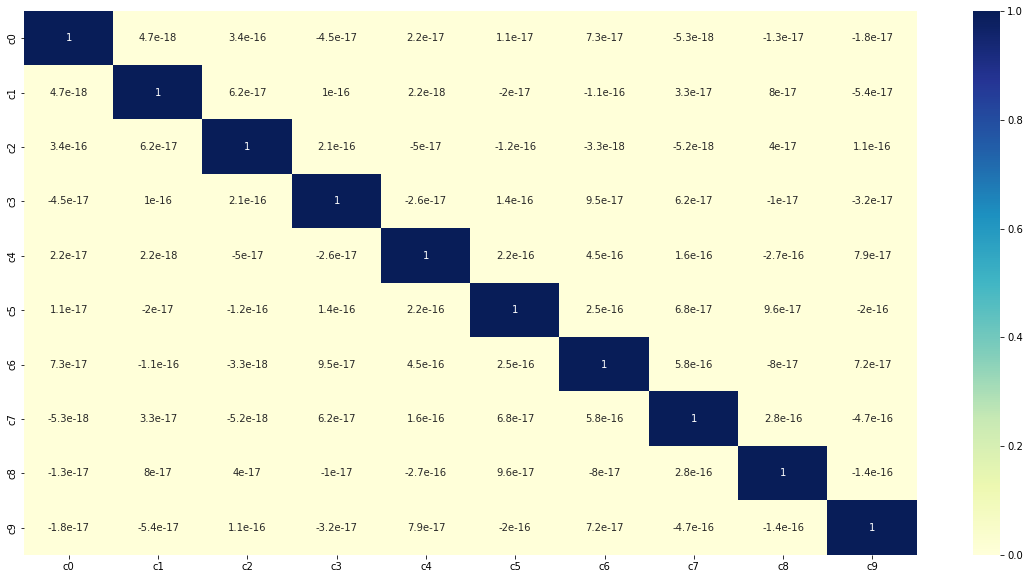

In [ ]:
# 9.2 Plotting correlation heatmap
_ = plt.figure(figsize = (20,10))
_ = sns.heatmap(pca_cor, cmap="YlGnBu", annot=True)
_ = plt.plot()

## Classification with PCA components
Classification with just 150 features (principal components) as per above graph

In [ ]:
# 10.0 PCA with 80% explained variance:

n_comp = 150
pca = decomposition.PCA(n_components = n_comp)
pca_rf = pca.fit_transform(X)

In [ ]:
# 10.1 Check array shape:

pca_rf.shape

(60000, 150)

In [ ]:
# 10.2 Split PCA components into train/test:

X_train, X_test, y_train, y_test = train_test_split(
                                                    pca_rf, y, 
                                                    test_size=0.33
                                                    ) 
                                                    

In [ ]:
# 10.3 Instantiate Random Forest Classifier class:

clf = RandomForestClassifier(
                             n_estimators=300,
                             max_depth=None
                             )

In [ ]:
# 10.4 Train classifier:

start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print((end-start) / 60)   # 4 minutes

3.5120872894922894


## Evaluate RF Classifier

In [ ]:
# 10.5 Make predictions over X_test:

y_preds = clf.predict(X_test)

In [ ]:
# 10.6 Get accuracy score:
#      Logloss would have been a better measure

acc = accuracy_score(y_test, y_preds)
acc

0.9424747474747475

In [ ]:
# 10.7 Get confusion matrix:

confusion_matrix(y_test, y_preds)

array([[1928,    1,   10,    5,    4,    3,   23,    0,    7,    1],
       [   1, 2110,   19,    5,    2,    0,    7,    4,    3,    2],
       [  12,    4, 1854,   18,   12,    1,    6,   15,   25,    5],
       [   4,    5,   42, 1875,    3,   20,    6,   23,   36,   16],
       [   3,    4,   33,    1, 1817,    2,   11,   13,    3,   47],
       [  12,    0,    7,   48,    7, 1643,   34,    5,   24,   13],
       [  17,    2,    8,    0,    5,   31, 1993,    1,    7,    0],
       [   4,    4,   12,    4,   15,    0,    0, 1935,    4,   47],
       [  12,   11,   22,   42,   11,   33,   10,    5, 1714,   24],
       [   5,    4,    5,   32,   42,    4,    0,   55,   14, 1822]])

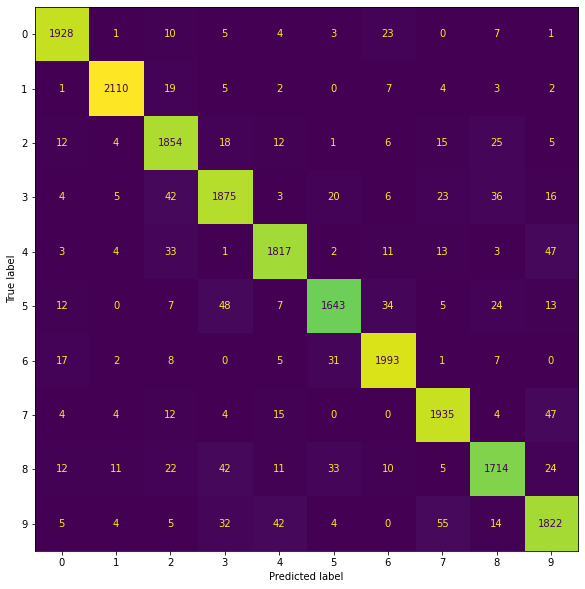

In [ ]:
# 10.8 Plot confusion matrix: 
# Ref     https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn-metrics-confusionmatrixdisplay

_= plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, y_preds)
ax = plt.gca()
disp = ConfusionMatrixDisplay(
                               confusion_matrix=cm,
                               display_labels=clf.classes_
                             )

_= disp.plot(ax=ax, colorbar = False)
_= plt.show()

In [ ]:
##################### I am Done #############################